# Mseed Further Data Analysis of Winter Conditions and Mean Variable Statistics
In this notebook I will be continuing with my third iteration of studying mseed file sizes by understanding the correspondence between the seasons and data file size. I will also be calculating statistical values for these data points.

In [17]:
# basic imports
import os
import glob
import obspy
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt

# more specific imports
from obspy import read
from os.path import exists
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from IPython.display import Markdown as md
from IPython.display import Image, display
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [18]:
# defining constants
SECONDS_IN_A_DAY = 60 * 60 * 24
filepath = 'WinterData/'
starttime = UTCDateTime('2015-06-01T11:00:00') # starting in the antartctic winter
endtime = starttime + SECONDS_IN_A_DAY

# initializing data structures
"""
X: holds the file sizes for each day interval's data, X[i] holds
   the data for the i+1th day

y: holds the day #, with the indices shifted up by one
"""
X = []
y = np.array(list(range(1, 61)))

In [19]:
# define values for the data query
client = Client('IRIS')
net = 'XH'
sta = 'RS07'
chan = 'LH*'
loc = '--'

In [20]:
# defining a function to save the data to the 60DayData folder
def save_stream(st, filename):
    path = filepath + filename + ".mseed"
    st.write(filename=path, format="MSEED")

# loop to query the data for each of 60 days and save it in different files

"""
1. query the data for the correct time period
2. save the data in the correct file
3. update the start and endtimes
4. query the size of the file and put it in X[i]
"""
if not exists('WinterData/60.mseed'):
    for i in range(1, 61):
    #     querying for data
        st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

    #     saving stream to file
        save_stream(st, str(i))

    #     updating start and end times
        starttime = endtime
        endtime = starttime + SECONDS_IN_A_DAY

    #     saving the file size in data array
        X.append((os.path.getsize(filepath + str(i) + '.mseed'))/(1000000.))
else:
    for i in range(1,61):
        X.append(os.path.getsize(filepath + str(i) + '.mseed')/(1000000.))

0.339968


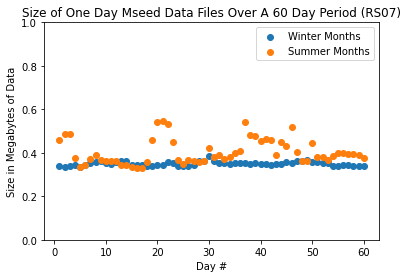

In [21]:
# validation of data
print(X[0])

# get basic scatter plot of the data
ax = plt.gca()
ax.set_xlabel('Day #')
ax.set_ylabel('Size in Megabytes of Data')
ax.set_title('Size of One Day Mseed Data Files Over A 60 Day Period of the Antarctic Winter')

plt.scatter(y,X)
ax.set_ybound(0, 1)

# plotting the summer values
X_summer = []

for i in range(1,61):
        X_summer.append(os.path.getsize('60DayData/' + str(i) + '.mseed')/(1000000.))
        
# get basic scatter plot of the data
ax = plt.gca()
ax.set_xlabel('Day #')
ax.set_ylabel('Size in Megabytes of Data')
ax.set_title('Size of One Day Mseed Data Files Over A 60 Day Period (RS07)')


plt.scatter(y,X_summer)
ax.set_ybound(0, 1)

plt.legend(['Winter Months', 'Summer Months'])

In [22]:
# we will calculate the mean, median, and stdev
print("Mean: " + str(np.mean(X)))
print("Median: " + str(np.median(X)))
print("Std dev: " + str(np.std(X)))

Mean: 0.34979839999999995
Median: 0.34816
Std dev: 0.009195497193735637


In contrast, these are the statistics we got for the Antarctic summer.

Mean: 0.4051626666666666
Median: 0.38707199999999997
Std dev: 0.057223390623842706

We can see that in the plot for the summer months above that the average data flow has far larger fluctuations and a higher mean and median for data value size. This fits with the hypothesis that less events = smaller file size.

We will now make sure that this is not an artifact dependent on the station we're using.

In [64]:
# define values for the data query
client = Client('IRIS')
net = 'XH'
sta = 'DR02'
chan = 'LH*'
loc = '--'

In [65]:
# defining more constants
SECONDS_IN_A_DAY = 60 * 60 * 24
filepathDR02 = 'WinterData_DR02/'
starttime = UTCDateTime('2015-06-01T11:00:00') # starting in the antartctic winter
endtime = starttime + SECONDS_IN_A_DAY

# initializing data structures
"""
X: holds the file sizes for each day interval's data, X[i] holds
   the data for the i+1th day

y: holds the day #, with the indices shifted up by one
"""
X_DR02_w = []

In [66]:
# defining a function to save the data to the DR02 Winter folder
def save_stream(st, filename):
    path = filepathDR02 + filename + ".mseed"
    st.write(filename=path, format="MSEED")

# resetting the starttime
starttime = UTCDateTime('2015-06-01T11:00:00') # starting in the antartctic winter
    
# loop to query the data for each of 60 days and save it in different files

"""
1. query the data for the correct time period
2. save the data in the correct file
3. update the start and endtimes
4. query the size of the file and put it in X[i]
"""
if not exists('WinterData_DR02/60.mseed'):
    for i in range(1, 61):
    #     querying for data
        st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

    #     saving stream to file
        save_stream(st, str(i))

    #     updating start and end times
        starttime = endtime
        endtime = starttime + SECONDS_IN_A_DAY

    #     saving the file size in data array
        X_DR02_w.append((os.path.getsize('WinterData_DR02/' + str(i) + '.mseed'))/(1000000.))
else:
    for i in range(1,61):
        X_DR02_w.append(os.path.getsize('WinterData_DR02/' + str(i) + '.mseed')/(1000000.))

In [67]:
# defining a function to save the data to the DR02 Winter folder
def save_stream(st, filename):
    path = 'SummerData_DR02/' + filename + ".mseed"
    st.write(filename=path, format="MSEED")

"""
1. query the data for the correct time period
2. save the data in the correct file
3. update the start and endtimes
4. query the size of the file and put it in X[i]
"""


#     array to hold summer data
X_DR02_s = []    
    

starttime = UTCDateTime('2015-01-17T11:00:00') # starting in the antartctic summer
endtime = starttime + SECONDS_IN_A_DAY

filepath = 'SummerData_DR02/'

if not exists('SummerData_DR02/60.mseed'):
    for i in range(1, 61):
    #     querying for data
        st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
    #     saving stream to file
        save_stream(st, str(i))

    #     updating start and end times
        starttime = endtime
        endtime = starttime + SECONDS_IN_A_DAY

    #     saving the file size in data array
        X_DR02_s.append((os.path.getsize(filepath + str(i) + '.mseed'))/(1000000.))
else:
    for i in range(1,61):
        X_DR02_s.append(os.path.getsize(filepath + str(i) + '.mseed')/(1000000.))

60


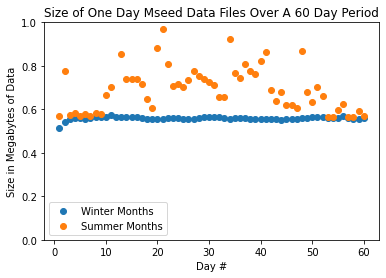

In [68]:
# get basic scatter plot of the data
ax = plt.gca()
ax.set_xlabel('Day #')
ax.set_ylabel('Size in Megabytes of Data')
ax.set_title('Size of One Day Mseed Data Files Over A 60 Day Period of the Antarctic Winter (DR02)')

plt.scatter(y,X_DR02_w)
ax.set_ybound(0, 1)

# plotting the summer values
X_summer = []

for i in range(1,61):
        X_summer.append(os.path.getsize('60DayData/' + str(i) + '.mseed')/(1000000.))
        
# get basic scatter plot of the data
ax = plt.gca()
ax.set_xlabel('Day #')
ax.set_ylabel('Size in Megabytes of Data')
ax.set_title('Size of One Day Mseed Data Files Over A 60 Day Period (DR02)')

print(len(X_DR02_s))
plt.scatter(y,X_DR02_s)
ax.set_ybound(0, 1)

plt.legend(['Winter Months', 'Summer Months'])

In [69]:
print(X)

[0.339968, 0.335872, 0.339968, 0.344064, 0.335872, 0.344064, 0.352256, 0.356352, 0.360448, 0.352256, 0.34816, 0.356352, 0.360448, 0.360448, 0.344064, 0.344064, 0.344064, 0.339968, 0.339968, 0.344064, 0.344064, 0.356352, 0.352256, 0.339968, 0.339968, 0.339968, 0.344064, 0.360448, 0.364544, 0.385024, 0.364544, 0.352256, 0.352256, 0.34816, 0.352256, 0.352256, 0.352256, 0.34816, 0.352256, 0.34816, 0.34816, 0.344064, 0.34816, 0.34816, 0.356352, 0.352256, 0.364544, 0.360448, 0.36864, 0.356352, 0.356352, 0.352256, 0.352256, 0.339968, 0.339968, 0.344064, 0.344064, 0.339968, 0.339968, 0.339968]


In [70]:
print(X_summer)

[0.458752, 0.487424, 0.487424, 0.376832, 0.335872, 0.344064, 0.372736, 0.38912, 0.36864, 0.364544, 0.364544, 0.364544, 0.344064, 0.344064, 0.335872, 0.331776, 0.331776, 0.356352, 0.458752, 0.540672, 0.544768, 0.53248, 0.45056, 0.36864, 0.34816, 0.36864, 0.360448, 0.356352, 0.360448, 0.421888, 0.380928, 0.38912, 0.372736, 0.380928, 0.397312, 0.4096, 0.540672, 0.483328, 0.475136, 0.454656, 0.462848, 0.458752, 0.38912, 0.45056, 0.43008, 0.520192, 0.405504, 0.364544, 0.364544, 0.446464, 0.380928, 0.380928, 0.36864, 0.385024, 0.397312, 0.397312, 0.393216, 0.393216, 0.38912, 0.376832]


In [71]:
print(X_DR02_w)

[0.512, 0.540672, 0.557056, 0.561152, 0.561152, 0.557056, 0.561152, 0.565248, 0.565248, 0.565248, 0.57344, 0.565248, 0.565248, 0.565248, 0.565248, 0.565248, 0.561152, 0.557056, 0.557056, 0.557056, 0.557056, 0.561152, 0.561152, 0.561152, 0.557056, 0.557056, 0.557056, 0.561152, 0.565248, 0.565248, 0.565248, 0.565248, 0.561152, 0.557056, 0.561152, 0.561152, 0.561152, 0.557056, 0.557056, 0.557056, 0.557056, 0.557056, 0.557056, 0.55296, 0.557056, 0.557056, 0.557056, 0.561152, 0.561152, 0.565248, 0.565248, 0.565248, 0.561152, 0.561152, 0.561152, 0.569344, 0.561152, 0.557056, 0.557056, 0.561152]


In [72]:
print(X_DR02_s)

[0.569344, 0.77824, 0.57344, 0.581632, 0.569344, 0.577536, 0.569344, 0.581632, 0.577536, 0.667648, 0.704512, 1.032192, 0.856064, 0.741376, 0.73728, 0.741376, 0.7168, 0.647168, 0.606208, 0.88064, 0.970752, 0.806912, 0.708608, 0.7168, 0.704512, 0.733184, 0.774144, 0.753664, 0.741376, 0.724992, 0.712704, 0.65536, 0.65536, 0.925696, 0.765952, 0.745472, 0.806912, 0.77824, 0.761856, 0.823296, 0.864256, 0.688128, 0.638976, 0.679936, 0.618496, 0.618496, 0.606208, 0.868352, 0.679936, 0.63488, 0.704512, 0.663552, 0.565248, 0.565248, 0.598016, 0.622592, 0.565248, 0.565248, 0.59392, 0.569344]


In [74]:
# we will calculate the mean, median, and stdev
print('==== Summer ====')
print("Mean: " + str(np.mean(X_DR02_s)))
print("Median: " + str(np.median(X_DR02_s)))
print("Std dev: " + str(np.std(X_DR02_s)))
print('')
print('==== Winter ====')
print("Mean: " + str(np.mean(X_DR02_w)))
print("Median: " + str(np.median(X_DR02_w)))
print("Std dev: " + str(np.std(X_DR02_w)))

==== Summer ====
Mean: 0.6980949333333333
Median: 0.69632
Std dev: 0.10926002690552275

==== Winter ====
Mean: 0.5597866666666668
Median: 0.561152
Std dev: 0.007759611078455463
